# Schaalbalk toevoegen aan een kaart met behulp van `matplotlib`

De productie van kaartmateriaal vereist dat we een aantal cartografische basiselementen toevoegen aan het product, en dat we een aantal cartografische regels te volgen hebben. Een van de elementen die we toe dienen te voegen is een schaalbalk. Wanneer we een ruimtelijke plot (een kaart dus eigenlijk) maken met behulp van `matplotlib`, kunnen we gebruik maken van de [maplotlib-scalebar bibliotheek](https://pypi.org/project/matplotlib-scalebar/) om een schaalbalk toe te voegen.

We zullen het toevoegen van een schaalbalk illustreren aan de hand van de dataset met Vlaamse gemeentegrenzen. Eerst importeren we de vereiste bibliotheken en de data, en stellen we de figuurgrootte in:

<AxesSubplot:>

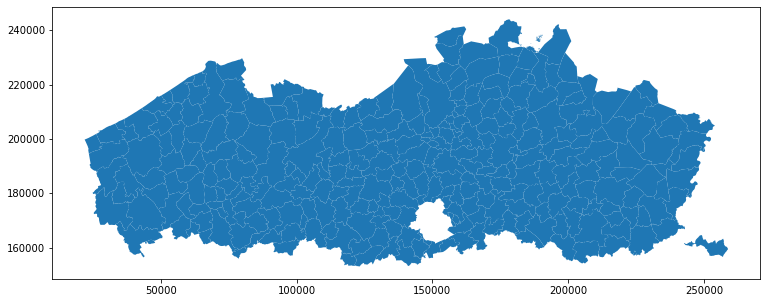

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

plt.rcParams['figure.figsize'] = [15, 5]

refgem = gpd.read_file('data/refgem_2018.shp')
refgem.plot()

## Een `ScaleBar`-object aanmaken

De enige parameter die vereist is om een `ScaleBar`-object aan te maken is `dx`. Deze waarde komt overeen met de afmeting van één enkele pixel op het terrein. De eenheden waarin deze waarde wordt meegegeven is afhankelijk van het gekozen coördinaatreferentiesysteem (CRS). We maken hierbij het onderscheid tussen geprojecteerde CRS (zoals de Belgische Lambert '72 projectie, EPSG:31370) en geografische coördinaten (zoals WGS'84, EPSG:4326).

**Geprojecteerde coördinaatsystemen (in meters)**

De meest eenvoudige manier om een schaalbalk toe te voegen is van toepassing wanneer we we werken met een geprojecteerd CRS. In dit geval worden onze afstanden uitgedrukt in meters met `dx = 1`. Merk op dat de data initieel al beschikbaar waren in Lambert '72, maar dat we dit in onderstaande code nog eens bevestigen:

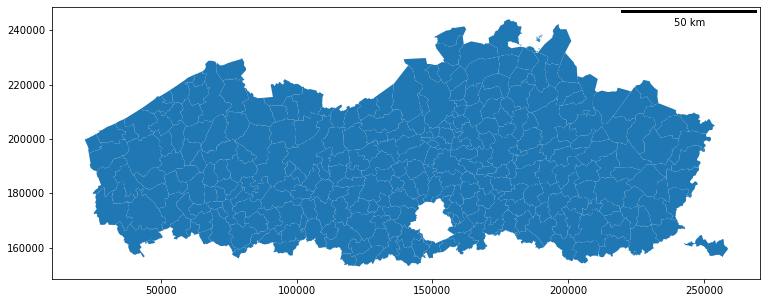

In [48]:
refgem_LB72 = refgem.set_crs(31370, allow_override=True)

ax = refgem_LB72.plot()
ax.add_artist(ScaleBar(1))

**Geografische coördinaatsystemen (in graden)**

Met een geografisch CRS worden afstanden uitgedrukt in graden. In dit geval wordt de waarde van `dx` ingesteld als de afstand in meters tussen twee punten met dezelfde breedte (latitude, northing, Y-coördinaat) die op een gehele lengtegraad (longitude, easting, X-coördinaat) van elkaar gelegen zijn. Deze afstand komt dus overeen met de afstand tussen parallelen op een kleincirkel. We kunnen deze afstand berekenen met online tools, zoals [(the Great Circle calculator)](http://edwilliams.org/gccalc.htm) of met behulp van `GeoPandas` zelf.

Eerst maken we een `GeoSeries`-object met twee punten die in ons studiegebied gelegen zijn. Deze twee punten hebben dus dezelfde breedteligging, maar liggen op één graad in de lengteligging van elkaar. We drukken deze coördinaten uit in een geografische CRS, zoals WGS'84, en berekenen de corresponderende geprojecteerde coördinaten, zoals in Lambert '72. Tot slot berekenen we de afstand tussen beide punten in meters:

In [56]:
from shapely.geometry.point import Point

# Punten met coordinaten in WGS'84 (EPSG:4326)
punten = gpd.GeoSeries([Point(4.0, 50.9), Point(5.0, 50.9)], crs=4326)
# Zelfde punten, maar met coordinaten in LB'72 (EPSG:31370)
punten = points.to_crs(31370)
# De afstand tussen beide punten
afstand_meters = punten[0].distance(punten[1])
print('%.3f m' % afstand_meters)

85984.734 m


De berekende afstand (70.451 km) wijkt af van de afstand die we zouden krijgen van de online tool (70.351 km). Op deze schaal zullen we dit verschil echter negeren.

Nu we over de waarde van `dx` beschikken, kunnen we de data voorstellen en een schaalbalk toevoegen. Volledigheidshalve transformeren we de data met gemeentegrenzen naar WGS'84:

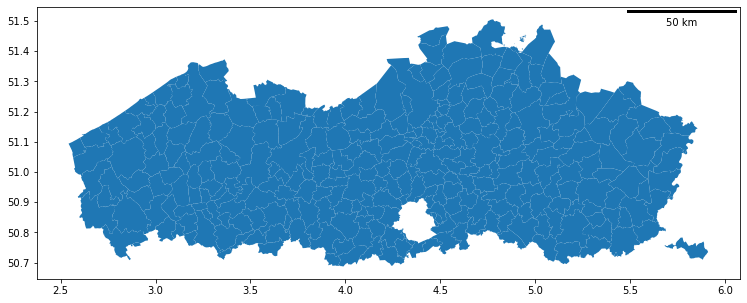

In [50]:
refgem_WGS84 = refgem.to_crs(4326)

ax = refgem_WGS84.plot()
ax.add_artist(ScaleBar(afstand_meters))

## Andere eenheden gebruiken

De waarde van `dx` wordt standaard uitgedrukt in het metrische stelsel (meter, kilometer). We kunnen dit aanpassen door de parameters `units` en `dimension` te veranderen. De eenheden in onderstaande tabel kunnen we onder meer gebruiken, waar verschillende waarden voor `units` en `dimension` gegeven worden:

| `dimension` | `units` | onschrijving
| -----     |:-----:| -----
| `si-length` | `km`, `m`, `cm`, `um`| si-eenheden
| `imperial-length` |`in`, `ft`, `yd`, `mi`| Imperiaals systeem
| `si-length-reciprocal` |`1/m`, `1/cm`| Inverse si-eenheden
| `angle`|`deg`| Hoeken

In onderstaande voorbeeld wordt een schaalbalk aangemaakt waarbij de eenheden zijn ingesteld in graden:

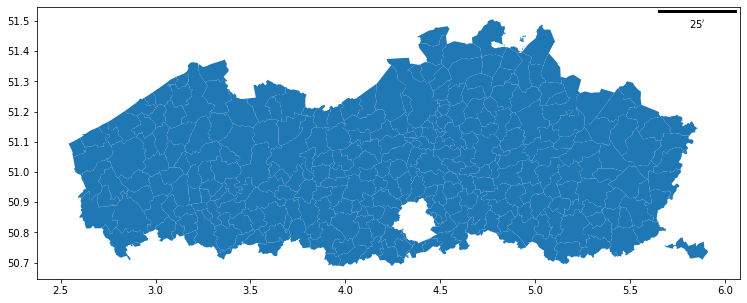

In [51]:
refgem_WGS84 = refgem.to_crs(4326)

ax = refgem_WGS84.plot()
ax.add_artist(ScaleBar(1, dimension="angle", units="deg"))

## Schaalbalk opmaken

Vanzelfsprekend is het mogelijk om de schaalbalk volledig naar eigen wens op te bouwen. We geven enkele voorbeelden.

**Positie en opmaak:**

In [52]:
sb1 = ScaleBar(
dx=1, label='Schaalbalk 1',
    location='upper left', 
    label_loc='left', scale_loc='bottom'
)

**Kleur:**

In [53]:
sb2 = ScaleBar(
    dx=1, label='Schaalbalk 2', location='center', 
    color='#b32400', box_color='yellow',
    box_alpha=0.8
)

**Lettertype en tekstopmaak:**

Het lettertype is upgebouwd uit zes eigenschappen: `family`, `style`, `variant`, `stretch`, `weight`, `size` (en `math_fontfamily`). 

>**Gebruikshandleiding:** we verwijzen naar de website over '[FontProperties](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties)' voor meer informatie.

In [54]:
sb3 = ScaleBar(
    dx=1, label='Schaalbalk 3',
    font_properties={'family':'serif', 'size': 'large'},
    scale_formatter=lambda value, unit: f'> {value} {unit} <'
)

**Het resultaat:**

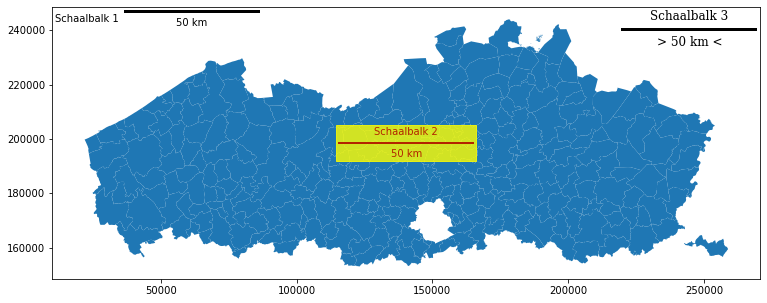

In [55]:
ax = refgem_LB72.plot()
ax.add_artist(sb1)
ax.add_artist(sb2)
ax.add_artist(sb3)

> **Gebruikshandleiding:** voor meer informatie over de `matplotlib-scalebar`-bibliotheek verwijzen we naar de website van [PyPI](https://pypi.org/project/matplotlib-scalebar/) en [GitHub](https://github.com/ppinard/matplotlib-scalebar).